In [79]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris


In [80]:
iris = load_iris()

In [81]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [82]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [83]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [84]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [85]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [86]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [87]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [88]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])

In [89]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [90]:
from matplotlib import pyplot as plt
%matplotlib inline

In [91]:
df0 =  df[df.target==0]
df1 =  df[df.target==1]
df2 =  df[df.target==2]

In [92]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


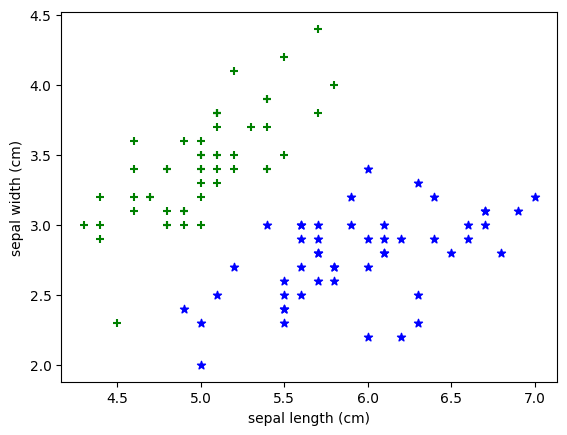

In [93]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', marker='*')

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X = df.drop(['target', 'flower_name'], axis='columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [96]:
y = df.target

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [98]:
from sklearn.svm import SVC

In [99]:
model_1 = SVC(kernel="linear")
model_2 = SVC(kernel="poly")
model_3 = SVC(kernel="rbf")


In [100]:
model_1.fit(x_train,y_train)
model_2.fit(x_train,y_train)
model_3.fit(x_train,y_train)

SVC()

In [101]:
model_1.score(X_test,y_test)


0.36666666666666664

In [102]:
model_2.score(X_test,y_test)


0.36666666666666664

In [103]:
model_3.score(X_test,y_test)

0.2

In [104]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)


In [105]:
scores = cross_val_score(SVC(), x, y, cv=kf)


In [106]:

print("Cross-validation scores:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

Cross-validation scores: [1.         1.         0.93333333 0.93333333 0.96666667]
Mean Accuracy: 0.9666666666666668
Standard Deviation: 0.029814239699997188


In [107]:
from sklearn.model_selection import GridSearchCV

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}



grid_svc = GridSearchCV(SVC(probability=True), param_grid_svc, cv=kf, scoring='accuracy')
grid_svc.fit(x, y)

print("Best SVC Params:", grid_svc.best_params_)
print("Best CV Accuracy:", grid_svc.best_score_)

Best SVC Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best CV Accuracy: 0.9733333333333334


In [108]:
best_svc = grid_svc.best_estimator_
y_pred_prob = best_svc.predict_proba(X_test)

In [109]:
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

>>> Class 0 AUC Score: 1.00
>>> Class 1 AUC Score: 0.99
>>> Class 2 AUC Score: 0.99


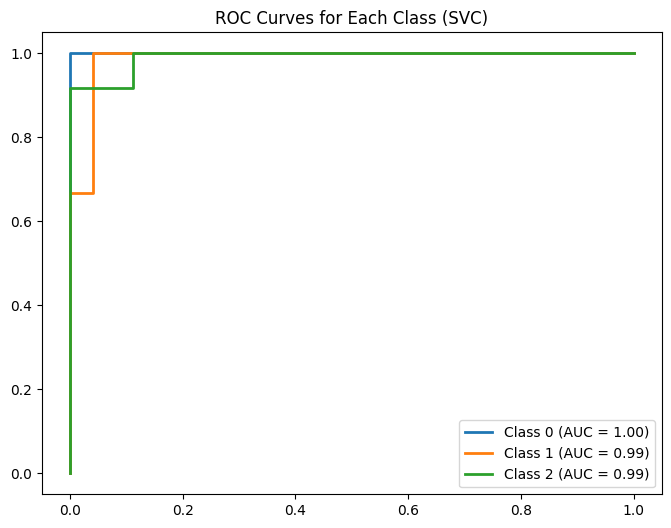

In [112]:
plt.figure(figsize=(8,6))
plt.title("ROC Curves for Each Class (SVC)")

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    print(f">>> Class {i} AUC Score: {roc_auc:.2f}")
    plt.plot(fpr, tpr, lw=2, label=f"Class {i} (AUC = {roc_auc:.2f})")
plt.legend(loc="lower right")

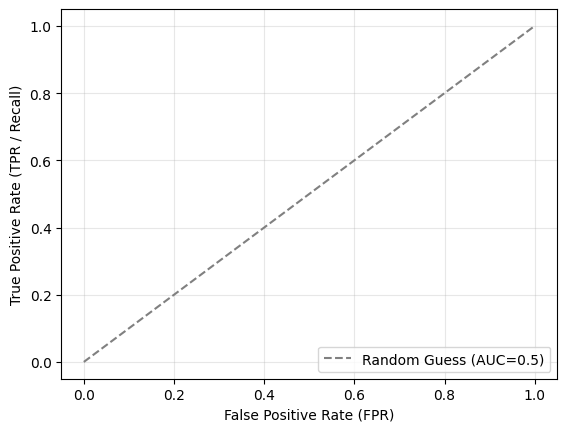

In [ ]:
plt.plot([0,1], [0,1], color='gray', linestyle='--', label='Random Guess (AUC=0.5)')

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR / Recall)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

#idk yeh sahi hai ki nahi??
#help me out on this one. mera chatgpt ka account khatam ho gaya hai